In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold, train_test_split
from functools import partial

import optuna

In [104]:
with open('./src/train.csv') as f:
    train = pd.read_csv(f)
with open('./src/test.csv') as f:
    test = pd.read_csv(f)

In [105]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   user_id                            10000 non-null  object 
 1   subscription_duration              10000 non-null  int64  
 2   recent_login_time                  10000 non-null  int64  
 3   average_login_time                 10000 non-null  float64
 4   average_time_per_learning_session  10000 non-null  float64
 5   monthly_active_learning_days       10000 non-null  int64  
 6   total_completed_courses            10000 non-null  int64  
 7   recent_learning_achievement        10000 non-null  float64
 8   abandoned_learning_sessions        10000 non-null  int64  
 9   community_engagement_level         10000 non-null  int64  
 10  preferred_difficulty_level         10000 non-null  object 
 11  subscription_type                  10000 non-null  obje

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
train.head(5)

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1


<Axes: xlabel='preferred_difficulty_level', ylabel='count'>

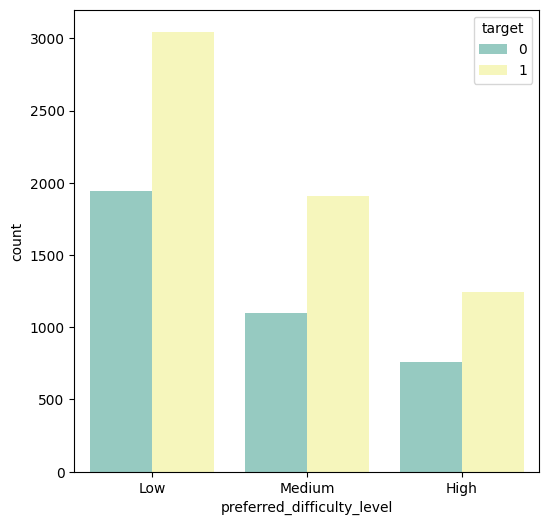

In [108]:
col = 'preferred_difficulty_level'
plt.figure(figsize = (6,6))
sns.countplot(data = train, x = col, hue = 'target', palette = 'Set3')
# plt.savefig(f'{col}.png')

In [109]:
train[train['target'] == 0].describe()

,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,customer_inquiry_history,payment_pattern,target
count,3801.000000,3801.00000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.0
mean,11.953959,15.05788,15.026762,46.456986,12.502236,12.246251,75.000310,3.087609,3.870560,2.009997,3.506972,0.0
std,6.618295,8.42873,2.956732,39.639733,6.854200,3.630554,9.873574,1.755430,1.259105,1.409145,2.302291,0.0
min,1.000000,1.00000,3.636424,0.011515,1.000000,1.000000,35.941755,0.000000,1.000000,0.000000,0.000000,0.0
25%,6.000000,8.00000,13.077376,14.485582,7.000000,10.000000,68.316764,2.000000,3.000000,1.000000,1.000000,0.0
50%,12.000000,15.00000,14.979239,34.773346,13.000000,12.000000,74.981448,3.000000,4.000000,2.000000,4.000000,0.0
75%,18.000000,22.00000,17.030607,68.298309,18.000000,15.000000,81.520614,4.000000,5.000000,3.000000,6.000000,0.0
max,23.000000,29.00000,26.998490,179.176060,24.000000,27.000000,107.135153,11.000000,5.000000,10.000000,7.000000,0.0


In [110]:
train[train['target'] == 1].describe()

,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,customer_inquiry_history,payment_pattern,target
count,6199.00000,6199.000000,6199.000000,6199.000000,6199.000000,6199.000000,6199.000000,6199.000000,6199.000000,6199.000000,6199.000000,6199.0
mean,11.86272,14.985804,14.974035,60.105533,12.571866,12.216003,75.047419,3.016616,3.895628,2.010808,3.500403,1.0
std,6.59050,8.322310,3.029275,63.477523,6.980077,3.636558,10.027058,1.754416,1.264061,1.428306,2.316925,0.0
min,1.00000,1.000000,2.366189,0.013535,1.000000,2.000000,36.115562,0.000000,1.000000,0.000000,0.000000,1.0
25%,6.00000,8.000000,12.976618,15.908562,7.000000,10.000000,68.249866,2.000000,3.000000,1.000000,1.000000,1.0
50%,12.00000,15.000000,14.979217,39.705116,12.000000,12.000000,75.199591,3.000000,4.000000,2.000000,3.000000,1.0
75%,18.00000,22.000000,16.964874,80.159683,19.000000,15.000000,81.867694,4.000000,5.000000,3.000000,6.000000,1.0
max,23.00000,29.000000,26.284396,503.372616,24.000000,27.000000,112.643828,12.000000,5.000000,8.000000,7.000000,1.0


In [112]:
train.target.astype('category', copy=False)
train = train.drop(columns='user_id')
train

,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
1,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,22,29,14.727623,84.053558,18,16,64.966803,2,5,Low,Premium,1,1,1
9996,10,11,19.374054,45.464833,9,8,82.750244,3,3,Medium,Basic,2,7,1
9997,7,27,18.240978,127.302411,24,14,81.567839,3,5,High,Basic,1,6,1
9998,11,7,18.783800,5.297234,10,10,89.885656,4,5,Low,Basic,2,0,1


In [113]:
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators = 50, max_depth = 13, learning_rate = 0.3)
X = train.iloc[:,:-1]
y = train.iloc[:,-1]
X = pd.get_dummies(X)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=39)

In [114]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=13, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [115]:
model.predict(X_val)

array([1, 1, 1, ..., 1, 0, 1])

In [116]:
y_val

9229    0
7476    1
2702    1
3941    1
3540    1
       ..
5348    0
8740    0
7104    1
2488    1
6128    1
Name: target, Length: 2000, dtype: int64

In [117]:
from sklearn.metrics import f1_score
f1_score(y_val, model.predict(X_val), average='macro')

0.5129906670186231

<BarContainer object of 16 artists>

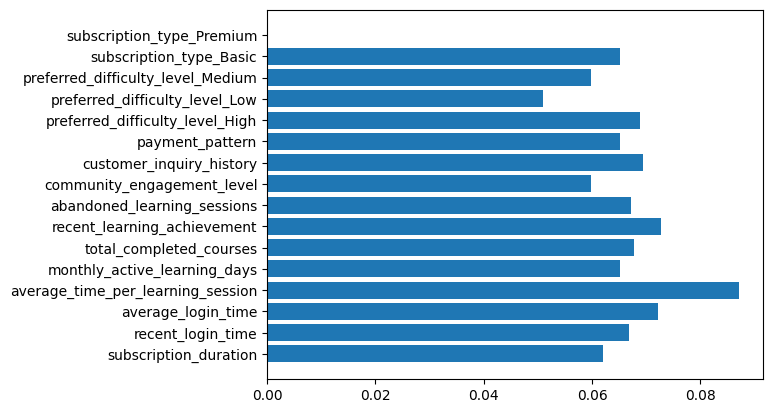

In [118]:
plt.barh(X_train.columns, model.feature_importances_)

In [133]:
with open('./src/sample_submission.csv') as f:
    submission = pd.read_csv(f)
pred = model.predict(pd.get_dummies(test.drop(columns = 'user_id')))
submission.target = pred
submission.to_csv('./src/submission.csv', index=False)